In [1]:
import numpy as np

In [2]:
rng = np.random.default_rng(seed =1701)
x = rng.integers(100,size=10)
x

array([90, 40,  9, 30, 80, 67, 39, 15, 33, 79], dtype=int64)

In [6]:
print([x[3],x[7],x[2]])    #list of indices of the 3 most important features.
ind = [3,7,2]
x[ind]                     #fancy indexing: indexing numpy array by a list of indices.

[30, 15, 9]


array([30, 15,  9], dtype=int64)

In [7]:
ind = np.array([[3,7],[4,5]])
x[ind]


array([[30, 15],
       [80, 67]], dtype=int64)

In [12]:
X = np.arange(12).reshape((3,4))
print(X)


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [14]:
row = np.array([0,1,2])
col = np.array([2,1,3])
X[row,col] 

array([ 2,  5, 11])

In [16]:
X[row[:,np.newaxis],col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [17]:
################when we say arrya of ( x[]) the arguments inside are as follows: [depth,rows,coulmns] for 3D. [rows,coulmns] for 2D. [rows] for 1D.#############

In [18]:
X[2,[2,0,1]]

array([10,  8,  9])

In [19]:
X[1: , [2,0,1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [26]:
mask = np.array([True,False,True,False])
X[row[:,np.newaxis],mask]              #(3,1)  (1,4)   >>>>> the mask is indicating that we will take the 0th and 2nd column of the rows and skip the 1st and 3rd column.
                                       #which means that the shape is (3,2). 3 from the np.newaxis and 2 that were indicated from the mask.

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [25]:
mask = np.array([1,0,1,0])
X[row[:,np.newaxis],mask]              #this one is different from the previous one, this one the mask is an array of integers but the previous one was an array of booleans which means it indicates condition that
                                       #the row should satisfy

array([[1, 0, 1, 0],
       [5, 4, 5, 4],
       [9, 8, 9, 8]])

In [27]:
mask = np.array([True,False,True,False])
X[:,mask]                                        #this gave the same result as the 1st one because the X is from the rows (X[row[:,np.newaxis],col]) 
                                                 #and that is the same condition we used for the rows at the 1st example.
#keep in mind that in all of these, the mask has to have the same number of values as the number of columns of the original array.
#and the output of the mask if conditional have to have the same number of values as the number of rows of the original array.

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [54]:
mean = [0,0]
cov = [[1,2] , [2,5]]
X = rng.multivariate_normal(mean, cov, 100)

In [55]:
X.shape

(100, 2)

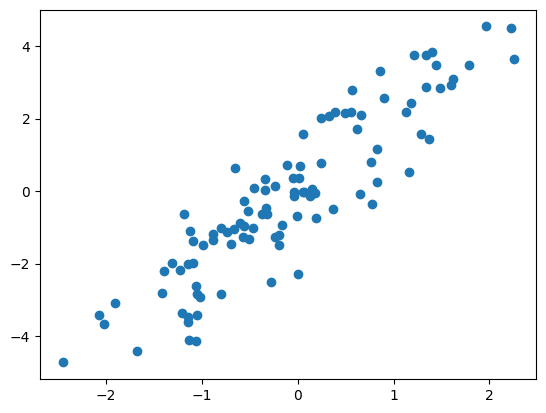

In [56]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0] , X[:,1])
plt.show()

In [57]:
indices = np.random.choice(X.shape[0] , 20 , replace=False)              #replace=False means that the same index will not be chosen again (no repetition).
val = X[indices]
print(indices)
print(val.shape)

[41 25 90 46 67 64 28 92 68 77 10 55 43 63 33 11 26  5 27 80]
(20, 2)


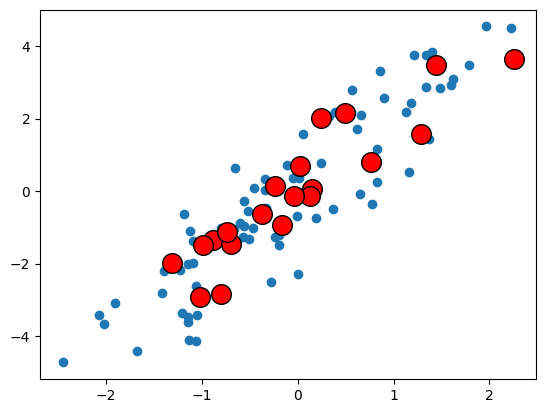

In [58]:
plt.scatter(X[:,0] , X[:,1])
plt.scatter(val[:,0], val[:,1]  , edgecolor='black' , s=200 , c='r' , facecolor='none')
plt.show()

#this is an example of fancy indexing on how to split dataset into train and validation set (for example).

In [61]:
x = np.arange(10)
i = np.array([2,1,8,4])
x[i] = 99
x
x[i] -= 10
x

array([ 0, 89, 89,  3, 89,  5,  6,  7, 89,  9])

In [73]:
x = np.zeros(10)        # Create an array of 10 zeros
x[[0,0]] = [4,6]        # Set element 0 and 0 to 4 then 6 respectively
x

array([6., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [69]:
i = [2,3,3,4,4,4]
x[i] += 1
x
#why didn't it output [6,0,1,2,3,0,0,0,0,0]?
#because assigning an index to +=1 twice doesn't mean it will sum the 2 ones or 3 ones in the case of the 4th index. it will not update in other words.
#it will just add 1 to the value of the index, regardless of how many times it was assigned.



array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [74]:
#to solve this we do this:
np.add.at(x,i,1)
x
#this means that we add 1 to the index i of x. as simple as that. if the index is called again, it will add 1 again.

array([6., 0., 1., 2., 3., 0., 0., 0., 0., 0.])

In [99]:
x = rng.normal(size=100)

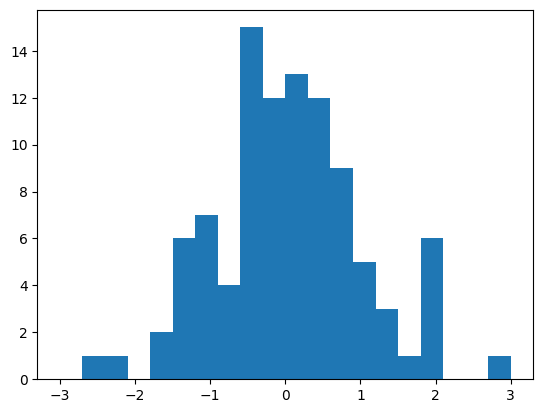

In [100]:
#to plot a histogram of x:
plt.hist(x , range=(-3,3) , bins = 20)
plt.show()

(-5, 5) (-4, 4) (-3, 3)
50 50 50


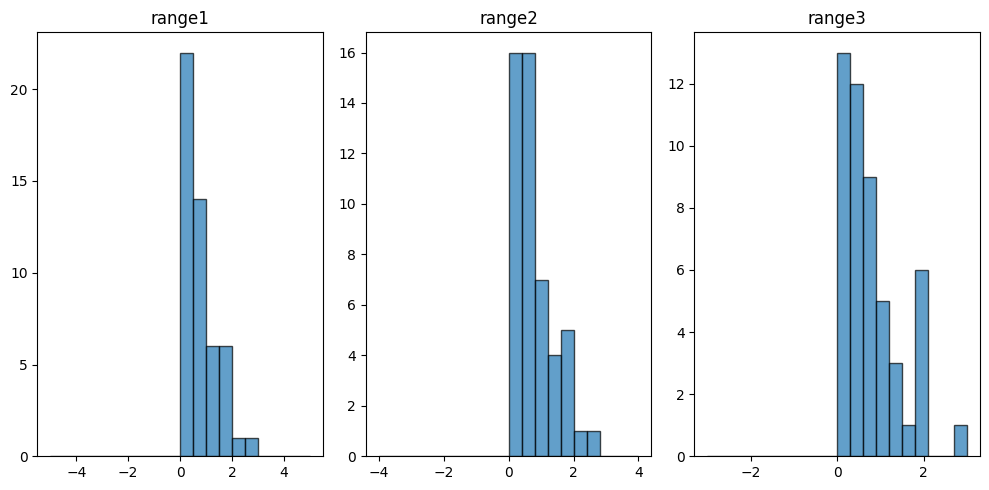

In [108]:
#now to count how many values we got in each range (-5,5) , (-4,4) , (-3,3):
range1 = (-5,5)
range2 = (-4,4)
range3 = (-3,3)
print(range1,range2,range3)


filtered_x = x[x > 0]
count_range1 = np.sum((filtered_x >= range1[0]) & (filtered_x < range1[1]))
count_range2 = np.sum((filtered_x >= range2[0]) & (filtered_x < range2[1]))
count_range3 = np.sum((filtered_x >= range3[0]) & (filtered_x < range3[1]))
print(count_range1,count_range2,count_range3)


plt.figure(figsize=(10,5))
plt.subplot(131)
plt.hist(filtered_x, bins=20, range=range1, alpha=0.7, edgecolor='black')        
plt.title('range1')

plt.subplot(132)
plt.hist(filtered_x, bins=20, range=range2, alpha=0.7, edgecolor='black')
plt.title('range2')

plt.subplot(133)
plt.hist(filtered_x, bins=20, range=range3, alpha=0.7, edgecolor='black')
plt.title('range3')

plt.tight_layout()
plt.show()

#this only means that we created a hist of the values above 0 but for the whole x. we wanted to count the above zero values for each range.
#not the whole x in those ranges.

In [115]:
#we use np.searchsorted to find the index of the first value in x that is greater than or equal to each of the values in bins.
ranges =np.linspace(-5,5,20)
freq = np.zeros(20)
i = np.searchsorted(ranges , x)      #the searchsorted function returns the index of the bin that each value in x belongs to. (where is x in ranges?)
np.add.at(freq, i, 1)                #add 1 to the corresponding bin. (add 1 to freq[i]). why? because we want to count the number of values in each bin.
print(i)
print(freq)


[10 12 10  8  9  9 11 10  7  7 11  9  8  8  4  9 10 11 11  9 12 13 10 11
  8 11 11  8  9 10 10  9  7  8 13  9 15  8 11 10  9  9  9  9 10 11 11 12
  7 11 11 10 11 10  9  7  8 11 12 10  8 12 13 10  8 10  9 10  9 14 10 12
 10  9 10 14 11 10  9 12 10 11 14  6  9 12  9 12 10 10 11 13  7  5  4 14
 14  9 11 11]
[ 0.  0.  0.  0.  2.  1.  1.  6. 10. 20. 22. 19.  9.  4.  5.  1.  0.  0.
  0.  0.]


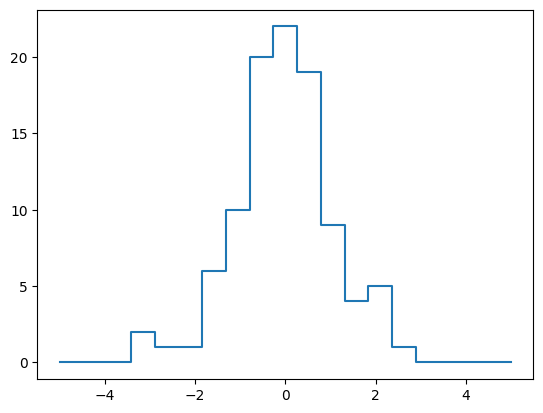

In [114]:
plt.plot(ranges , freq , drawstyle = 'steps')
plt.show()

In [119]:
###examples on the np.searchsorted() function:
a = np.array([1,2,3,4,5,6,7,8,9])
b = np.array([1,3,5,7,9])
print(np.searchsorted(a,b))               #where would the elements of b be inserted in a to maintain order?
print(np.searchsorted(a,b,side='right'))  #are these values indices or the actual values? it is the indices of a or b? of a.
#if side='left'  the output is (a[i-1] < v <= a[i])  and if side='right'  the output is (a[i-1] <= v < a[i])
#another example:
a = np.array([1,2,3,4,5,6,7,8,9])
b = np.array([0,1,2,3,4,5,6,7,8,9,10])
print(np.searchsorted(a,b))               #where would the elements of b be inserted in a to maintain order?
print(np.searchsorted(a,b,side='right'))  #are these values indices or the actual values? it is the indices of a or b? of a.

[0 2 4 6 8]
[1 3 5 7 9]
[0 0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9 9]


In [120]:
import numpy as np

arr = np.array([2, 4, 6, 6, 10])
values = np.array([5, 6])

indices_left = np.searchsorted(arr, values, side='left')
indices_right = np.searchsorted(arr, values, side='right')

print("Indices (Left):", indices_left)
print("Indices (Right):", indices_right)


Indices (Left): [2 2]
Indices (Right): [2 4]


In [121]:
x =rng.integers(0,10,(4,6))
x

array([[3, 0, 6, 4, 7, 2],
       [5, 0, 4, 3, 7, 4],
       [1, 9, 7, 2, 0, 3],
       [3, 3, 5, 2, 3, 2]], dtype=int64)

In [126]:
print(np.sort(x,axis=0))        #sort by column
print("_"*50)
print(np.sort(x,axis=1))        #sort by row
#but this ruined the relationship ebtween the data.


[[1 0 4 2 0 2]
 [3 0 5 2 3 2]
 [3 3 6 3 7 3]
 [5 9 7 4 7 4]]
__________________________________________________
[[0 2 3 4 6 7]
 [0 3 4 4 5 7]
 [0 1 2 3 7 9]
 [2 2 3 3 3 5]]


In [128]:
x = np.array([7,2,3,1,6,5,4])
np.partition(x, 3)                  #the 1st 3 elements are the smallest 3 elements in the array

array([2, 1, 3, 4, 6, 5, 7])

In [131]:
x = rng.integers(0,10,(4,6))
print(x)
print("_"*50)
print(np.partition(x,2,axis=1))            # 2nd smallest element in each row

[[5 4 5 6 8 1]
 [9 0 9 8 7 9]
 [7 1 3 4 4 2]
 [2 9 0 8 6 5]]
__________________________________________________
[[1 4 5 6 8 5]
 [0 7 8 9 9 9]
 [1 2 3 4 4 7]
 [0 2 5 8 6 9]]


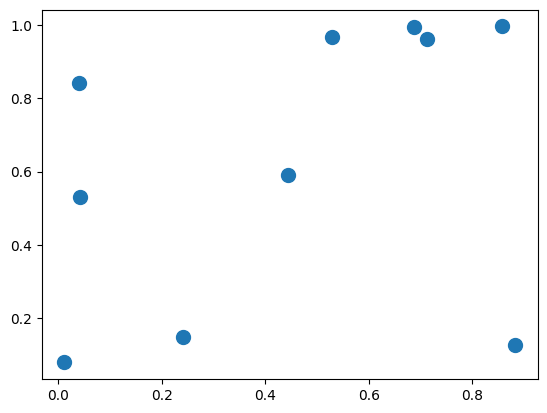

In [195]:
x = rng.random((10,2))
plt.scatter(x[:,0], x[:,1], s=100)

In [140]:
#calculate the distance between each point and all its neighbours, then draw a line point each point and 2 of its closest neighbours.
#To do this, we need to use the function "kneighbors_graph" from sklearn.neighbors.
#1st step: calculate the distance between each point and all its neighbours:
from sklearn.neighbors import kneighbors_graph
A = kneighbors_graph(X, 2, mode='distance', include_self=True)

#2nd step: draw a line point each point and 2 of its closest neighbours:
import networkx as nx
G = nx.from_scipy_sparse_matrix(A)                     #this function needs to be replaced by a function that draws a line between each point and 2 of its closest neighbours
nx.draw(G, with_labels=True, font_weight='bold')      
plt.show()

AttributeError: module 'networkx' has no attribute 'from_scipy_sparse_matrix'

In [148]:
#we need to do this via numpy and matplotlib only
import numpy as np
import matplotlib.pyplot as plt
#1st step: calculate the distance between each point and all its neighbors:
#we need to do this via numpy and matplotlib only
def distance(x1,x2):
    j = np.sqrt((x1-x2)**2)
    return j

#now we apply that function to all the points in the dataset
#distance(x[:,0], x[:,1])?? no, i need to do this for all the points in the dataset, using a loop isn't permitted. so i need to use a vectorized approach
list_of_rows = x[:,0]
list_of_columns = x[:,1]
list_of_distances = []
for i in range(len(list_of_rows)):
    for j in range(len(list_of_columns)):
        list_of_distances.append(distance(list_of_rows[i], list_of_columns[j]))
        
print(list_of_distances)



[0.4190358202714949, 0.458197273732428, 0.7084912797226107, 0.36372177124874194, 0.301536178506275, 0.6817934183615635, 0.7818786525390347, 0.722455110942786, 0.5677872991975054, 0.22268357246919557, 0.06158143615578715, 0.10074288961672029, 0.351036895606903, 0.006267387133034208, 0.055918205609432725, 0.32433903424585575, 0.4244242684233269, 0.3650007268270783, 0.21033291508179763, 0.13477081164651217, 0.3808115548135229, 0.41997300827445605, 0.6702670142646387, 0.32549750579076997, 0.26331191304830304, 0.6435691529035915, 0.7436543870810627, 0.684230845484814, 0.5295630337395334, 0.1844593070112236, 0.3272695447974855, 0.3664309982584186, 0.6167250042486013, 0.27195549577473255, 0.20976990303226561, 0.5900271428875541, 0.6901123770650253, 0.6306888354687766, 0.476021023723496, 0.13091729699518617, 0.2729094062542471, 0.3120708597151802, 0.5623648657053629, 0.21759535723149415, 0.1554097644890272, 0.5356670043443157, 0.6357522385217869, 0.5763286969255382, 0.42166088518025757, 0.0765

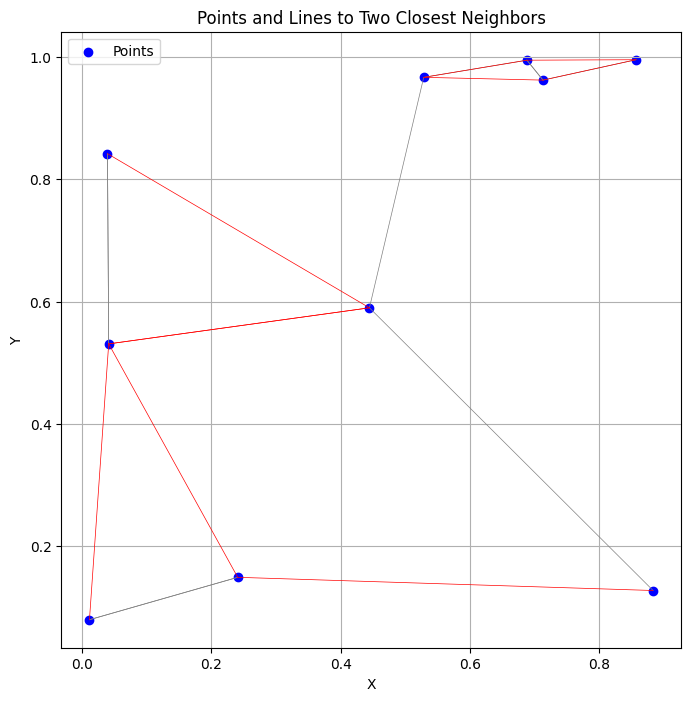

In [197]:
import numpy as np
import matplotlib.pyplot as plt

distances = np.sqrt(np.sum((x[:, np.newaxis] - x) ** 2, axis=2))          #Broadcasting (x[:, np.newaxis] - x) to (100, 1, 2) and (1, 100, 2). Then, summing over the last axis (axis=2) and taking the square root of the result. This gives us the distance between each point and every other point in the dataset.
nearest_indices = np.argsort(distances, axis=1)[:, 1:3]                   #find indices of two closest neighbors

plt.figure(figsize=(8, 8))
plt.scatter(x[:, 0], x[:, 1], c='blue', marker='o', label='Points')          #markeer ='o' indicates circle

#advanced indexing:
plt.plot(
    [x[:, 0], x[nearest_indices[:, 0], 0]],
    [x[:, 1], x[nearest_indices[:, 0], 1]],
    color='gray', linestyle='-', linewidth=0.5
)

plt.plot(
    [x[:, 0], x[nearest_indices[:, 1], 0]],
    [x[:, 1], x[nearest_indices[:, 1], 1]],
    color='red', linestyle='-', linewidth=0.5
)

#the grey lines are the lines to the first closest neighbor, the red lines are the lines to the second closest neighbor
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Points and Lines to Two Closest Neighbors')
plt.legend()
plt.grid(True)
plt.show()

In [161]:
print(x[nearest_indices])

[[[0.86198447 0.72204003]
  [0.9527991  0.95173073]]

 [[0.86198447 0.72204003]
  [0.68881586 0.90767145]]

 [[0.28796426 0.52474168]
  [0.42122185 0.15765226]]

 [[0.46130879 0.3900098 ]
  [0.12860652 0.26756159]]

 [[0.28796426 0.52474168]
  [0.64373767 0.79960333]]

 [[0.64373767 0.79960333]
  [0.86198447 0.72204003]]

 [[0.46130879 0.3900098 ]
  [0.12860652 0.26756159]]

 [[0.68881586 0.90767145]
  [0.86198447 0.72204003]]

 [[0.28796426 0.52474168]
  [0.42122185 0.15765226]]

 [[0.98123422 0.58669812]
  [0.64373767 0.79960333]]]


In [ ]:

#advanced indexing: 
plt.plot(x[:, 0][:, np.newaxis], x[:, 1][:, np.newaxis], color='black', linestyle='-', linewidth=0.5)
plt.plot(x[nearest_indices][:, :, 0], x[nearest_indices][:, :, 1], color='red', linestyle='-', linewidth=0.5)         #x[nearest_indices] returns a 3D array
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Points and Lines to Two Closest Neighbors')
plt.legend()
plt.grid(True)
plt.show()